## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Book.csv')

In [3]:
df.head(5)

,Weight,Height
0,75,130.0
1,52,125.0
2,59,123.0
3,72,135.0
4,64,131.5


Text(0, 0.5, 'Height')

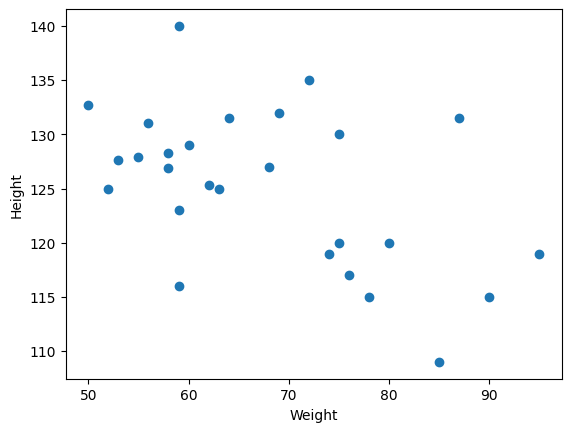

In [4]:
## Scatter Plot
plt.scatter(df['Weight'],[df['Height']])

plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,-0.504534
Height,-0.504534,1.000000


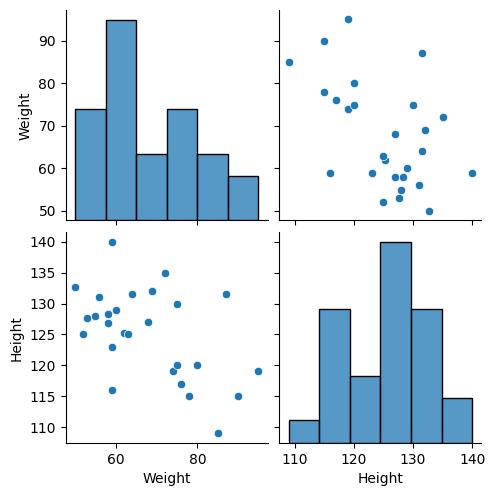

In [6]:
# Seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [7]:
## Independent and dependent features

X = df[['Weight']] # Independent data should be in dataframe or in 2 dimensional
y = df['Height'] # THis variable can be in series or 1D array.


In [8]:
# X = df['Weight']
# np.array(X).shape

In [9]:
X_series = df['Weight']
np.array(X_series).shape

(27,)

In [10]:
np.array(y).shape 

(27,)

In [11]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

In [12]:
X_train.shape

(20, 1)

In [13]:
## Standardization

from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_test

array([[ 0.99990947],
       [ 0.65951476],
       [ 1.17010683],
       [-1.38285353],
       [ 0.74461344],
       [ 2.02109362],
       [-0.53186674]])

In [17]:
## Apply Simple Linear regression

from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
print("Coefficient or slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or slope :  [-2.53381316]
Intercept :  125.9


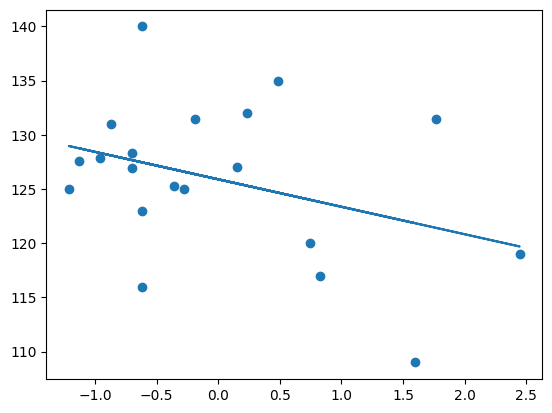

In [21]:
## Plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [22]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [23]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)




27.017916494709034
4.76351304167906
5.19787615230577


In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test, y_pred)
print(score)

0.4304774672663221


In [27]:
# adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)



0.3165729607195865

In [28]:
## OLS Linear regression
import statsmodels.api as sm

In [29]:
model = sm.OLS(y_train, X_train).fit()

In [30]:
prediction = model.predict(X_test)
print(prediction)

[-2.53358378 -1.67108717 -2.96483208  3.50389246 -1.88671132 -5.12107359
  1.34765095]


In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.052
Method:                 Least Squares   F-statistic:                           0.007675
Date:                Wed, 07 Jan 2026   Prob (F-statistic):                       0.931
Time:                        17:19:12   Log-Likelihood:                         -125.12
No. Observations:                  20   AIC:                                      252.2
Df Residuals:                      19   BIC:                                      253.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
## Prediction for new Data
regression.predict(scaler.transform([[130]]))

c:\Users\Nayem\Documents\Machine Learning and NLP\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([112.15396035])